In [1]:
# Warm-up 1: What does a HTML for a Table of links look like? 
# add another row or two to the table below
# in order to Scrape web pages you need to know how tables of links work


<table>
  <tr>
    <th>Category</th>
    <th>Name and Link</th>
  </tr>
  <tr>
    <td>Weather Site</td>
    <td><a href = "https://www.weather.gov/mkx/">NWS MKX</a></td>
  </tr>
  <tr>
    <td>Madison Restaurant</td>
    <td><a href = "http://www.halongbaymadison.com/">Ha Long Bay</a></td>
  </tr>
   <tr>
    <td>Snow Forecaasting</td>
    <td><a href = "https://johndee.com/forecasts/forecast-graphic/">JohnDee.com</a></td>
  </tr>
</table>

In [13]:
# Warm-up 2: Requests
import requests

# Get this page using requests.  
url = "https://www.msyamkumar.com/cs220/s21/syllabus.html"
r = requests.get(url)

# make sure there is no error


# read the entire contents of the page into a single string variable
contents = None

# use the find method on a string to find the index of something
print(contents.find("Andy"))

# find the index of the phrase "title" in contents?
title_index = None
print(title_index)

# print out the next 30 chars after the end of the title tag
print()


# Takeaway:  It would be nice if there were a module that could make finding easy!

AttributeError: 'NoneType' object has no attribute 'find'

In [14]:
# 'from' is a way to import just one 'class' from a module
# bs4 is the module, BeautifulSoup is the class

from bs4 import BeautifulSoup

## Lecture 33: Scraping Web Data
### Learning Objectives:

33.1 Using the Document Object Model of web pages
- describe the 3 things a DOM element may contain, and give examples of each
- given an html string, identify the correct DOM tree of elements

33.2 Create BeautifulSoup objects from an html string and use prettify to display

33.3 Use the BeautifulSoup methods 'find' and 'find_all' to find particular elements by their tag

33.4 Inspect a BeautufulSoup element to determine the contents of a web page using get_text(), children, and attrs

33.5 Use BeautifulSoup to scrape a live web site. 


## Document Object Model:
### How your browser internally stores a HTML page as a hierarchy of Elements


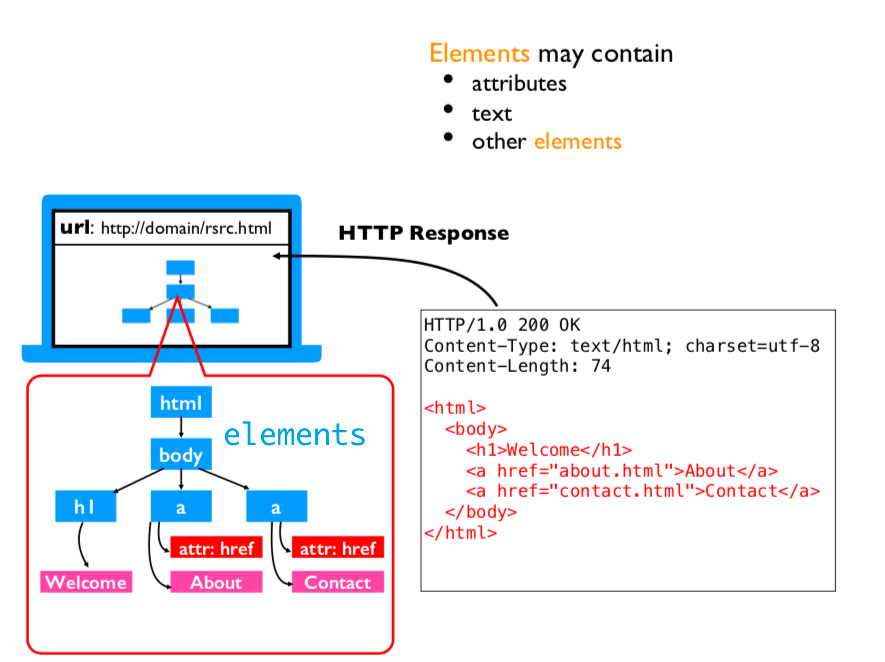


In [15]:
# take a look at the HTML in the cell below:

<b>To Do List</b><ul><li>Eat Healthy</li><li>Sleep <b>More</b></li><li>Exercise</li></ul>

### A Beautiful Soup object takes a string and parses it
#### We have to specify what kind of parsing we want done

In [16]:
html_stuff = "<b>To Do List</b><ul><li>Eat Healthy</li><li>Sleep <b>More</b></li><li>Exercise</li></ul>"

bs_obj = BeautifulSoup(html_stuff, "html.parser")

#print(bs_obj.prettify()  )  # the prettify method adds pretty formatting

### A  BeautifulSoup object can be searched for elements using:
- `find("")`             returns the first element matching the tag string
- `find_all("")`     returns a list of all elements

### Beautiful Soup Elements can be inspected by using:
- `get_text()`     returns the text associated with this element, if applicable
- `.children`      a list of all children of this element
- `.attr`          the atribute associated with this tag

In [17]:
html_stuff = "<b>To Do List</b><ul><li>Eat Healthy</li><li>Sleep <b>More</b></li><li>Exercise</li></ul>"
bs_obj = BeautifulSoup(html_stuff, "html.parser")
# find returns the first HTML 'tag' matching the string "b"

element = None 
element

In [18]:
# what is the type of a find?
print(type(element))
#print(element.get_text(), type(element.get_text()))

<class 'NoneType'>


In [19]:
# assert that this the  HAS a <ul> tag
assert bs_obj.find("ul") != None 

# assert that it does NOT have a "a" tag
assert bs_obj.find("a") == None

In [20]:
element_list = bs_obj.find_all("b")
element_list

[<b>To Do List</b>, <b>More</b>]

In [21]:
type(element_list[0])

bs4.element.Tag

In [23]:
# using a for loop to print .get_text() on each thing in element_list

    

In [24]:
# if there is no such element, find returns None, find_all returns []
# try to find some tag that is not in this html doc
print(bs_obj.find_all("please"))  # only searches for elements, not text
print(bs_obj.find("please"))      # if not present returns None

[]
None


In [25]:
# go to the slides?

In [26]:
# Remember the DOM....all HTML is hierarchical
# use .children to get all children of an element
# it must be turned into a list

element = bs_obj.find("ul")

#element.children
list(element.children)

[<li>Eat Healthy</li>, <li>Sleep <b>More</b></li>, <li>Exercise</li>]

### Practice: Scrape the CS 220 Syllabus page


### https://www.msyamkumar.com/cs220/f21/syllabus.html


In [27]:
# make a BeautifulSoup object from r.text
bs_obj = BeautifulSoup(r.text, "html.parser")

# find the title element and call get_text()
title_element = None
title_element.get_text()

'Meenakshi Syamkumar'

In [44]:
# find all <i> elements
i_elements = None
i_elements

[<i>Think Python 2nd Edition</i>, <i>Automate the Boring Stuff with Python</i>]

In [45]:
# find all <h3> elements
h3_elements = None
h3_elements

[<h3 class="mt-3">Additions To Syllabus Made During Semester</h3>,
 <h3>Learning Objectives</h3>,
 <h3 class="mt-3">Readings</h3>,
 <h3 class="mt-3">Lecture</h3>,
 <h3>Communication</h3>,
 <h3>Grading</h3>,
 <h3>Exams and Quizzes</h3>,
 <h3>Projects</h3>,
 <h3>Accommodations</h3>,
 <h3>Cheating</h3>,
 <h3>Recommendation Letters</h3>,
 <h3>Official Statements Required on the Syllabus</h3>]

In [47]:
# find the first 5 anchor elements...
a_elements = None
a_elements

[<a class="navbar-brand" href="schedule.html">Data Programming I</a>,
 <a class="nav-link" href="schedule.html">Schedule</a>,
 <a class="nav-link" href="syllabus.html">Syllabus</a>,
 <a class="nav-link" href="submission.html">Projects</a>,
 <a class="nav-link" href="help.html">How can I find help?</a>]

### To help grab the parts of an anchor, use .attrs and .children
- an an anchor element's .attrs is a dictionary of the attributes of the anchor
- many elements (a, p, ul, ... ) have children
- the children object must be changed to a list

In [29]:
# print out each element's attributes -- they are dictionaries
for element in a_elements:
    print (element.attrs)

NameError: name 'a_elements' is not defined

In [28]:
# print out each element's attributes and children
for element in a_elements:
    print (element.attrs, element.children)

NameError: name 'a_elements' is not defined

In [128]:
# print out just the URL's
for element in a_elements:
    print(element.attrs['href'])


schedule.html
schedule.html
syllabus.html
submission.html
help.html


In [51]:
# print out just the click text
for element in a_elements:
    print(list(element.children))

['Data Programming I']
['Schedule']
['Syllabus']
['Projects']
['How can I find help?']


## On Your Own:  Scraping a Wikipedia page: 

There is another file in the lecture notes for today that demonstrates how to scrape Wikipedia and create a directory of scraped web pages. 

We encourage you to read the code, run it, and understand how it works.

